Timeseries Plot For Multiple Model Builds

In [49]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)
library(ggthemr)
library(here)
library(lubridate)
ggthemr("fresh")
devtools::load_all()


Loading CHAPo



In [50]:
# The following types are being modelled:
# Erle - Alder - Aulne - Alnus
# Birke - Birch - Bouleau - Betula
# Gräser - Grasses - Graminées - Poaceae
# Ambrosia - Ragweed - Ambroisie - Ambrosia

species_all <- tibble(
  taxon = c(
    "Castanea",
    "Alnus",
    "Ulmus",
    "Cupressus",
    "Fraxinus",
    "Fagus",
    "Juglans",
    "Plantago",
    "Corylus",
    "Pinus",
    "Quercus",
    "Rumex",
    "Platanus",
    "Populus",
    "Poaceae",
    "Salix",
    "Betula",
    "Carpinus",
    "Urtica",
    "Taxus",
    "Picea",
    "Ambrosia"
  ),
  hirst_taxon = c(
    "kacasth0",
    "kaalnuh0",
    "kaulmuh0",
    "kacuprh0",
    "kafraxh0",
    "kafaguh0",
    "kajuglh0",
    "khplanh0",
    "kacoryh0",
    "kapinuh0",
    "kaquerh0",
    "khrumeh0",
    "kaplath0",
    "kapopuh0",
    "khpoach0",
    "kasalih0",
    "kabetuh0",
    "kacarph0",
    "khurtih0",
    "kataxuh0",
    "kapiceh0",
    "khambrh0"
  ),
  cosmo_taxon = c(
    NA_character_,
    "ALNU",
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    "POAC",
    NA_character_,
    "BETU",
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    "AMBR"
  ),
  fieldextra_taxon = c(
    NA_character_,
    "ALNU1",
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    "POAC1",
    NA_character_,
    "BETU1",
    NA_character_,
    NA_character_,
    NA_character_,
    NA_character_,
    "AMBR1"
  )
)

species <- species_all %>%
  filter(taxon %in% c("Alnus", "Ambrosia", "Betula", "Poaceae"))

stations <-
  tibble(
    hirst_station = c(
      "PDS",
      "PBU",
      "PMU",
      "PBS",
      "PZH",
      "PLZ",
      "PBE",
      # "PPY",
      "PNE",
      "PVI",
      "PLS",
      "PGE",
      "PCF",
      "PLO",
      # "BLR",
      "PLU"
    ),
    station = c(
      "Wolfgang",
      "Buchs",
      "Münsterlingen",
      "Basel",
      "Zürich",
      "Luzern",
      "Bern",
      # "Payerne",
      "Neuchâtel",
      "Visp",
      "Lausanne",
      "Genève",
      "La-Chaux-de-Fonds",
      "Locarno",
      # "Balerna",
      "Lugano"
    ),
    cosmo_station = c(
      "CHDAVO",
      "CHBUCH",
      "CHMUEN",
      "CHBASE",
      "CHZUER",
      "CHLUZE",
      "CHBERN",
      # NA_character_,
      "CHNEUC",
      "CHVISP",
      "CHLAUS",
      "CHGENE",
      "CHLACH",
      "CHLOCA",
      # NA_character_,
      "CHLUGA"
    )
  ) %>%
  arrange(hirst_station)

In [51]:
data_dwh <- import_data_dwh(paste0(here(), "/data/dwh/pollen_dwh_hourly.txt"))
data_osm <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_osm/mod_pollen_combined.txt", type = "Operational")
data_assim <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_assim_v1/mod_pollen_combined.txt", type = "With Real-Time Data")
data_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_sdes_updated/mod_pollen_combined.txt", type = "With Real-Time Data and Phenology-Update")



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` fo

In [52]:
data <- bind_rows(
  data_dwh,
  data_osm,
  data_assim,
  data_sdes
)

data

taxon,station,date,hour,value,datetime,type,measurement
<chr>,<chr>,<date>,<int>,<dbl>,<dttm>,<chr>,<chr>
Betula,Locarno,2019-01-01,0,NA,2019-01-01 00:00:00,Measurements,concentration
Betula,Basel,2019-01-01,0,NA,2019-01-01 00:00:00,Measurements,concentration
Betula,Bern,2019-01-01,0,NA,2019-01-01 00:00:00,Measurements,concentration
Betula,Buchs,2019-01-01,0,0,2019-01-01 00:00:00,Measurements,concentration
Betula,Lausanne,2019-01-01,0,NA,2019-01-01 00:00:00,Measurements,concentration
Betula,Wolfgang,2019-01-01,0,NA,2019-01-01 00:00:00,Measurements,concentration
Betula,Lugano,2019-01-01,0,0,2019-01-01 00:00:00,Measurements,concentration
Betula,Luzern,2019-01-01,0,NA,2019-01-01 00:00:00,Measurements,concentration
Betula,Münsterlingen,2019-01-01,0,NA,2019-01-01 00:00:00,Measurements,concentration


`summarise()` has grouped output by 'date', 'taxon', 'station'. You can override using the `.groups` argument.

Warning message:
“Removed 5 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5 row(s) containing missing values (geom_path).”


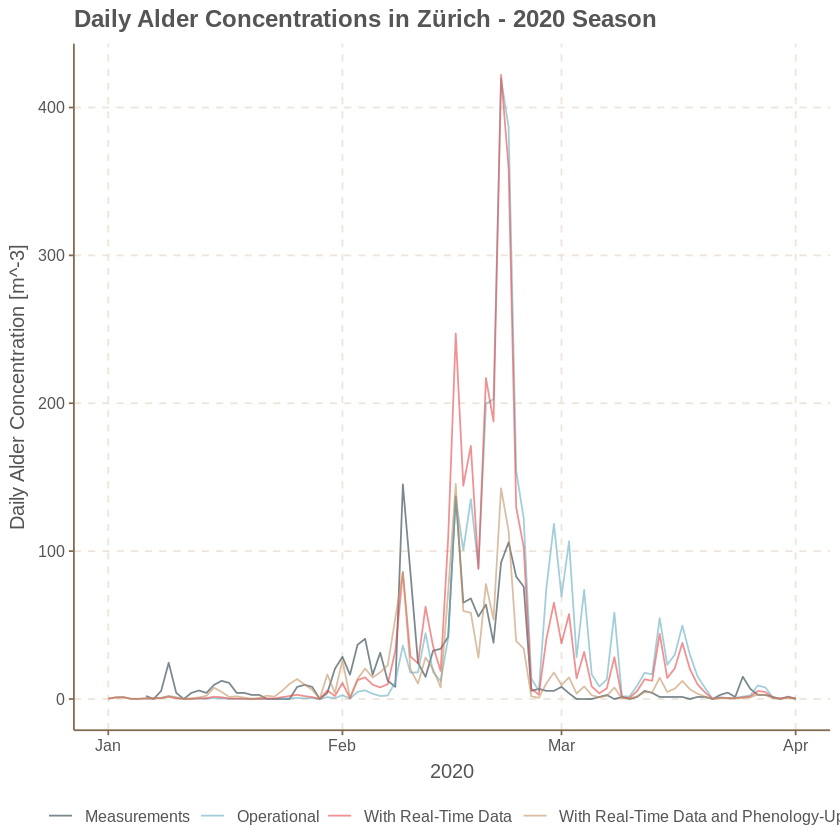

In [53]:
gg_timeseries <- data %>%
  filter(taxon == "Alnus",
        station == "Zürich",
        between(datetime, as_datetime("2020-01-01 00:00:00"), as_datetime("2020-04-01 00:00:00"))) %>%
        group_by(date, taxon, station, type) %>%
        summarise(value = mean(value, na.rm = TRUE)) %>%
  ggplot(aes(x = date, y = value, col = type)) +
  geom_line(alpha = 0.6) +
  scale_color_manual(values = swatch()[c(3, 2, 4, 5)]) +
  theme(legend.position="bottom", legend.title=element_blank()) +
  xlab("2020") +
  ylab("Daily Alder Concentration [m^-3]") +
  ggtitle("Daily Alder Concentrations in Zürich - 2020 Season")

gg_timeseries

ggsave(paste0(here(), "/timeseries.png"), gg_timeseries, width = 24, height = 13.5, dpi = 300, units = c("cm"))